In [1]:
library('readr')
library('magrittr')
library('dplyr')
library('tidyr')
library('ggplot2')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [2]:
raw_tbl <-
    read_tsv(
        'data.tsv',
        col_types=cols(
            `Sample:`=col_character(),
            `Donor`=col_factor(levels=c('Donor 35', 'Donor 40', 'Donor 41')),
            `Cellular State`=col_factor(levels=c('Unstimulated', 'Activated')),
            `Condition`=col_factor(levels=c('No electroporation', 'Mock electroporation', 'NDG mRNA electroporation')),
            .default=col_double()
        )
    )

raw_tbl %>% head

Sample:,Donor,Cellular State,Condition,Count,Live | Freq. of Parent,Live/CCR7+ CD45RO+ | Freq. of Parent,Live/CCR7+ CD45RO- | Freq. of Parent,Live/CCR7- CD45RO+ | Freq. of Parent,Live/CCR7- CD45RO- | Freq. of Parent,Live/GFP+ | Freq. of Parent,Live/GFP+/CCR7+ CD45RO+ | Freq. of Parent,Live/GFP+/CCR7+ CD45RO- | Freq. of Parent,Live/GFP+/CCR7- CD45RO+ | Freq. of Parent,Live/GFP+/CCR7- CD45RO- | Freq. of Parent,Live/GFP- | Freq. of Parent,Live/GFP-/CCR7+ CD45RO+ | Freq. of Parent,Live/GFP-/CCR7+ CD45RO- | Freq. of Parent,Live/GFP-/CCR7- CD45RO+ | Freq. of Parent,Live/GFP-/CCR7- CD45RO- | Freq. of Parent
a35e.fcs,Donor 35,Activated,Mock electroporation,543000,62.2,74.5,13.50,7.22,4.77,0.41,96.4,0.79,2.64,0.21,99.60,74.4,13.60,7.24,4.79
a35m.fcs,Donor 35,Activated,NDG mRNA electroporation,561000,63.1,68.9,17.90,8.13,5.08,84.40,73.6,16.90,7.07,2.50,15.60,43.9,23.30,13.90,19.00
a35o.fcs,Donor 35,Activated,No electroporation,859000,69.7,77.8,11.00,7.18,4.05,0.50,96.7,0.63,2.50,0.13,99.50,77.7,11.00,7.20,4.07
a40e.fcs,Donor 40,Activated,Mock electroporation,309326,53.3,74.8,9.26,12.70,3.33,0.39,96.4,1.72,1.56,0.31,99.60,74.7,9.29,12.70,3.34
a40m.fcs,Donor 40,Activated,NDG mRNA electroporation,320201,59.6,72.6,14.00,10.60,2.81,92.00,74.6,13.80,9.72,1.87,7.97,49.2,16.70,20.40,13.70
a40o.fcs,Donor 40,Activated,No electroporation,532000,71.0,78.8,8.07,11.20,1.84,0.22,93.6,2.42,3.63,0.36,99.80,78.8,8.08,11.30,1.85


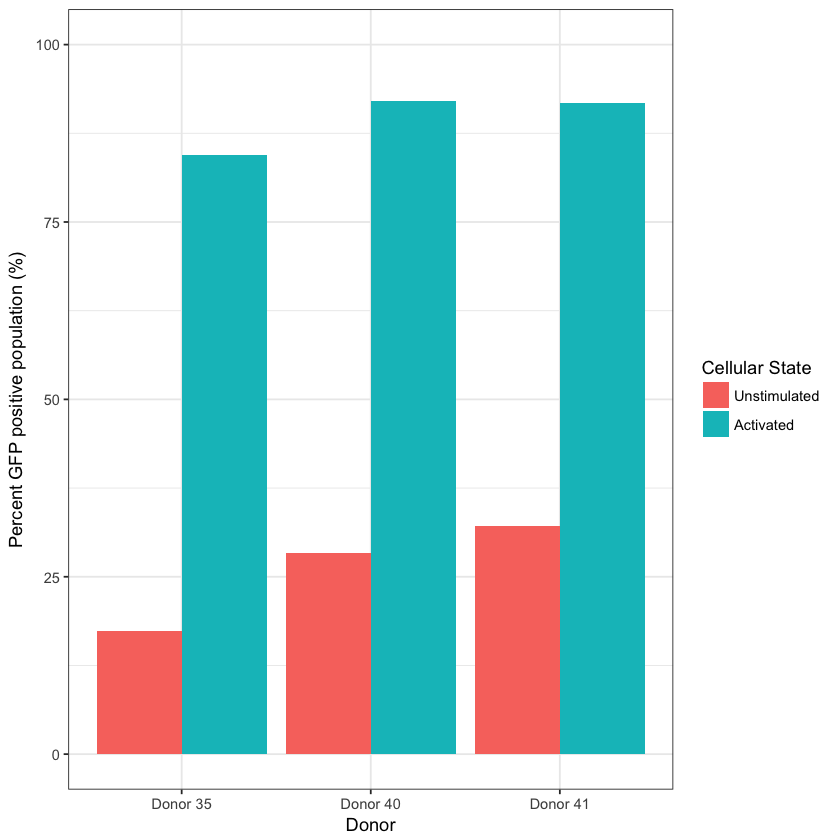

In [9]:
raw_tbl %>%
    filter(`Condition` == 'NDG mRNA electroporation') %>%
    ggplot(aes(x=`Donor`, y=`Live/GFP+ | Freq. of Parent`)) +
        geom_col(pos='dodge', aes(fill=`Cellular State`)) +
        ylab('Percent GFP positive population (%)') +
        ylim(0, 100) +
        theme_bw()

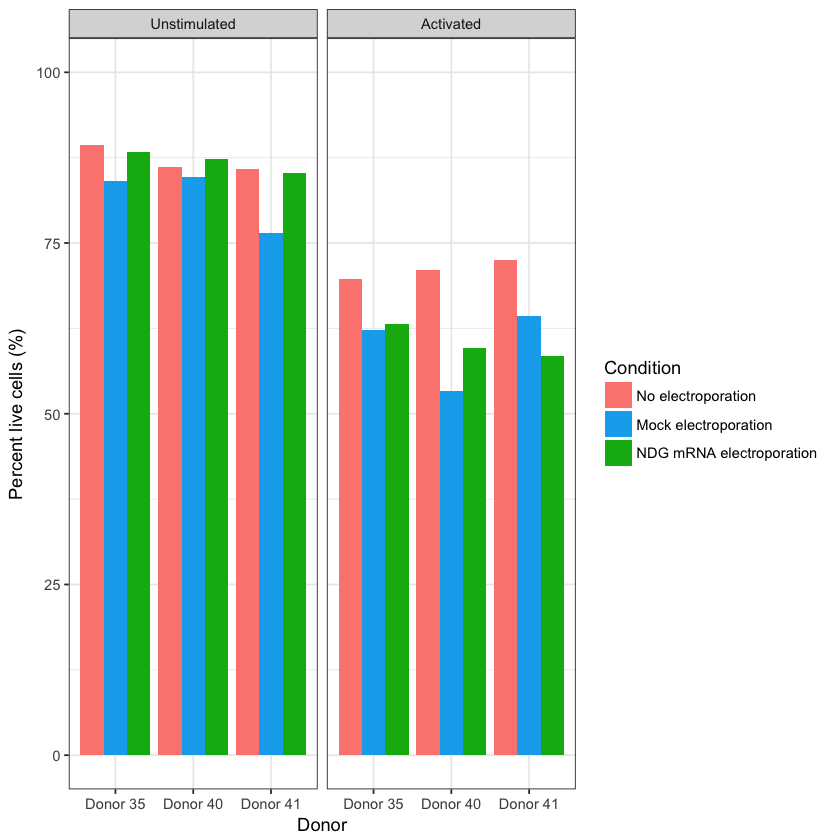

In [10]:
colors <- c("#FC877F", "#0EADEE", "#04B412")

raw_tbl %>%
    mutate(`Live count` = `Live | Freq. of Parent`) %>%
    ggplot(aes(x=`Donor`, y=`Live count`)) +
        geom_col(pos='dodge', aes(fill=`Condition`)) +
        facet_wrap(~`Cellular State`) +
        ylab('Percent live cells (%)') +
        ylim(0, 100) +
        scale_fill_manual(values=colors) +
        theme_bw()

In [5]:
mrna_comp_data <-
    rbind(
        raw_tbl %>%
            select(
                `Donor`:`Live | Freq. of Parent`,
                `Naive: CCR7+ CD45RO-`=`Live/GFP+/CCR7+ CD45RO- | Freq. of Parent`,
                `CM: CCR7+ CD45RO+`=`Live/GFP+/CCR7+ CD45RO+ | Freq. of Parent`,
                `EM: CCR7- CD45RO+`=`Live/GFP+/CCR7- CD45RO+ | Freq. of Parent`,
                `EMRA: CCR7- CD45RO-`=`Live/GFP+/CCR7- CD45RO- | Freq. of Parent`
            ) %>%
            mutate(`Cells`="GFP Positive"),
        raw_tbl %>%
            select(
                `Donor`:`Live | Freq. of Parent`,
                `Naive: CCR7+ CD45RO-`=`Live/GFP-/CCR7+ CD45RO- | Freq. of Parent`,
                `CM: CCR7+ CD45RO+`=`Live/GFP-/CCR7+ CD45RO+ | Freq. of Parent`,
                `EM: CCR7- CD45RO+`=`Live/GFP-/CCR7- CD45RO+ | Freq. of Parent`,
                `EMRA: CCR7- CD45RO-`=`Live/GFP-/CCR7- CD45RO- | Freq. of Parent`
            ) %>%
            mutate(`Cells`="GFP Negative"),
         raw_tbl %>%
            select(
                `Donor`:`Live | Freq. of Parent`,
                `Naive: CCR7+ CD45RO-`=`Live/CCR7+ CD45RO- | Freq. of Parent`,
                `CM: CCR7+ CD45RO+`=`Live/CCR7+ CD45RO+ | Freq. of Parent`,
                `EM: CCR7- CD45RO+`=`Live/CCR7- CD45RO+ | Freq. of Parent`,
                `EMRA: CCR7- CD45RO-`=`Live/CCR7- CD45RO- | Freq. of Parent`
            ) %>%
            mutate(`Cells`="Parent")
    ) %>%
    mutate(`Cells`=factor(`Cells`, levels=c('Parent', 'GFP Negative', 'GFP Positive'))) %>%
    gather(
        key=`Population`,
        value=`Freq_of_Parent`,
        `Naive: CCR7+ CD45RO-`:`EMRA: CCR7- CD45RO-`
    )

mrna_comp_data %>% head

Donor,Cellular State,Condition,Count,Live | Freq. of Parent,Cells,Population,Freq_of_Parent
Donor 35,Activated,Mock electroporation,543000,62.2,GFP Positive,Naive: CCR7+ CD45RO-,0.79
Donor 35,Activated,NDG mRNA electroporation,561000,63.1,GFP Positive,Naive: CCR7+ CD45RO-,16.90
Donor 35,Activated,No electroporation,859000,69.7,GFP Positive,Naive: CCR7+ CD45RO-,0.63
Donor 40,Activated,Mock electroporation,309326,53.3,GFP Positive,Naive: CCR7+ CD45RO-,1.72
Donor 40,Activated,NDG mRNA electroporation,320201,59.6,GFP Positive,Naive: CCR7+ CD45RO-,13.80
Donor 40,Activated,No electroporation,532000,71.0,GFP Positive,Naive: CCR7+ CD45RO-,2.42


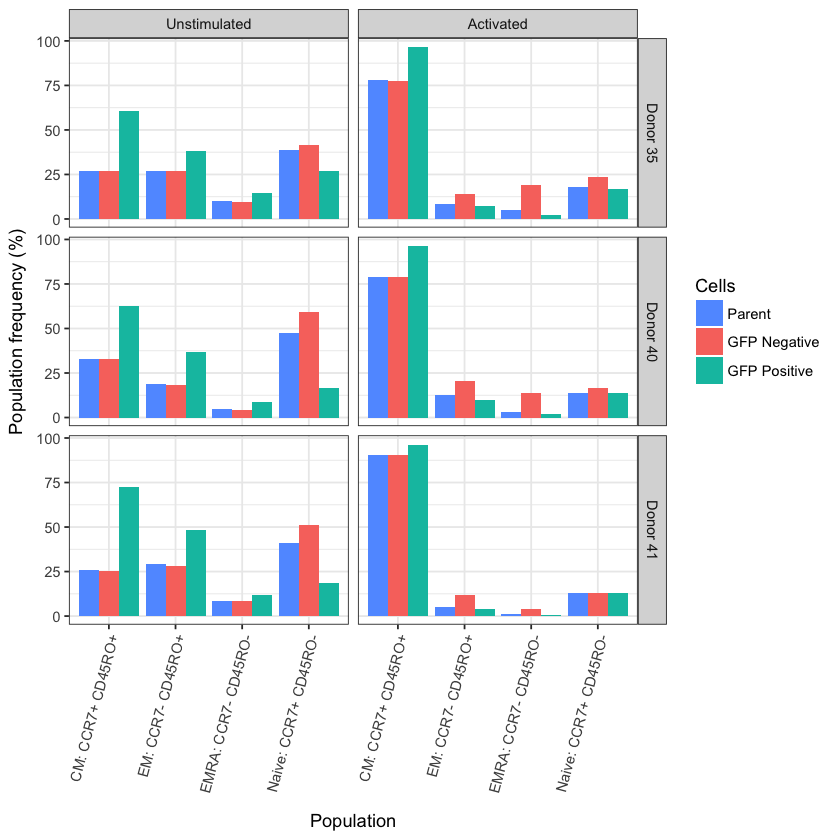

In [7]:
mrna_comp_data %>%
    filter(
        `Population` %in% c(
            'CM: CCR7+ CD45RO+',
            'EM: CCR7- CD45RO+',
            'Naive: CCR7+ CD45RO-',
            'EMRA: CCR7- CD45RO-'
        )
    ) %>%
    ggplot(aes(x=`Population`, y=`Freq_of_Parent`, fill=`Cells`)) +
        geom_col(position='dodge') +
        facet_grid(`Donor`~`Cellular State`) +
        ylab('Population frequency (%)') +
        theme_bw() +
        theme(axis.text.x=element_text(angle=75, hjust=1)) +
        scale_fill_manual(values=c("#619cff", "#f8766d", "#00c0af"))